In [1]:
import area_mandelbrot as am
import sampling_alg as sa

import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import Counter
import pickle

In [2]:
def mc_area(bounds, samples, iter, N):
    # Compute area ## ~10min runtime
    A_pr, A_lh, A_ot = [], [], []
    for i in iter:
        i_pr, i_lh, i_ot = [], [], []
        for s in samples:
            s_pr, s_lh, s_ot = [], [], []
            for n in range(N):
                s_pr += [[am.area(sa.sample_pr, bounds, s, i)]]
                s_lh += [[am.area(sa.sample_lh, bounds, s, i)]]
                s_ot += [[am.area(sa.sample_ot, bounds, s, i)]]
                print(f'Simulation {n+1, i, s} done')
            i_pr += [[np.mean(s_pr), np.std(s_pr)]]
            i_lh += [[np.mean(s_lh), np.std(s_lh)]]
            i_ot += [[np.mean(s_ot), np.std(s_ot)]]
            # print(f"Sample {s} done", end='\r', flush=True)
        A_pr += [i_pr]
        A_lh += [i_lh]
        A_ot += [i_ot]
        print(f"Iteration {i} done")
    return np.array(A_pr), np.array(A_lh), np.array(A_ot)

@nb.vectorize
def confidint(sigma, n, z):
    return (sigma * z) / np.sqrt(n)

In [3]:
def picklesave(A_pr, A_lh, A_ot):
    file_pr = open('area_pr', 'wb')
    pickle.dump(A_pr, file_pr)
    file_pr.close()
    file_lh = open('area_lh', 'wb')
    pickle.dump(A_lh, file_lh)
    file_lh.close()
    file_ot = open('area_ot', 'wb')
    pickle.dump(A_ot, file_ot)
    file_ot.close()

def pickleopen(dir=''):
    file_pr = open(f'{dir}area_pr', 'rb')
    A_pr = pickle.load(file_pr)
    file_pr.close()
    file_lh = open(f'{dir}area_lh', 'rb')
    A_lh = pickle.load( file_lh)
    file_lh.close()
    file_ot = open(f'{dir}area_ot', 'rb')
    A_ot = pickle.load(file_ot)
    file_ot.close()
    return A_pr, A_lh, A_ot

In [16]:
def plotarea3D(A, samples, iterations):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    X, Y = np.meshgrid(range(len(samples)), range(len(iterations)))
    ax.plot_surface(X, Y, A[:,:,0], cmap='viridis')
    ax.set_xlabel('Samples')
    ax.set_ylabel('Iterations')
    ax.set_zlabel('Area')
    plt.xticks(range(len(samples)), samples)
    plt.yticks(range(len(iterations)), iterations)
    plt.show()

def plotconv(A_pr, A_lh, A_ot, X):
    fig, ax = plt.subplots()
    plt.errorbar(X, A_pr[:,0], A_pr[:,1], fmt='o-', capsize=5, elinewidth=1)
    plt.errorbar(X, A_lh[:,0], A_lh[:,1], fmt='o-', capsize=5, elinewidth=1)
    plt.errorbar(X, A_ot[:,0], A_ot[:,1], fmt='o-', capsize=5, elinewidth=1)

    plt.legend(['PR', 'LH', 'OT'])
    ax.set_xscale('log')
    plt.ylabel('Area')
    plt.xlabel('no. of iterations/samples')
    plt.grid()
    plt.show()

In [5]:
samples = np.array([[j * 10 ** i for j in [1,4]] for i in range(2,6,2)]).flatten()   # sample size
iterations = np.array([[j * 10 ** i for j in [1,4]] for i in range(2,5)]).flatten()  # iterations
bounds = -2, 0.47, -1.12, 1.12              # real-min,max,im-min,max

# A_pr, A_lh, A_ot = mc_area(bounds, samples, iterations, 10)
A_pr, A_lh, A_ot = pickleopen('pickle/')

plt.close()
%matplotlib widget
plotarea3D(A_pr, samples, iterations)
plotarea3D(A_lh, samples, iterations)
plotarea3D(A_ot, samples, iterations)

In [7]:
confidint(A_pr[:,:,1], 100, 1.96)

array([[0.04747507, 0.02337936, 0.00475992, 0.00206637],
       [0.04726468, 0.02270539, 0.00481645, 0.00262589],
       [0.04472529, 0.02198384, 0.0052844 , 0.00250561],
       [0.04499478, 0.02162577, 0.00481669, 0.00253734],
       [0.05048118, 0.02596573, 0.00434999, 0.00257891],
       [0.05204761, 0.02724734, 0.00445293, 0.00219866]])

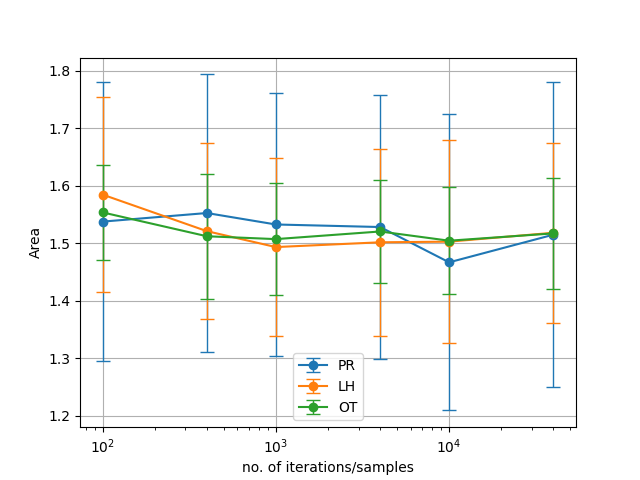

In [18]:
## A[iterations, samples, (area, std)]
plotconv(A_pr[:,0,:], A_lh[:,0,:], A_ot[:,0,:], iterations)